# Exploratory Data Analysis: arXiv Dataset

Source: https://www.kaggle.com/Cornell-University/arxiv?select=internal-citations.json

Note: Preprocessing was applied to this dataset.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import pickle
import seaborn as sns
sns.set_style("whitegrid")
import altair as alt


# Code for hiding seaborn warnings
import warnings
warnings.filterwarnings("ignore")

#### arXiv Category Taxonomy can be found here: https://arxiv.org/category_taxonomy

- Some papers in the dataset belong to more than one class (i.e. Physics and Computer Science) 

- Only papers that belong to a single category were used.

In [2]:
df = pd.read_csv("single.csv")
df.head()

,Unnamed: 0,id,submitter,authors,title,comments,journal-ref,doi,abstract,report-no,categories,versions,parent categories,clean categories
0,0,704,Pavel Nadolsky,"C. Bal\'azs, E. L. Berger, P. M. Nadolsky, C.-...",Calculation of prompt diphoton production cros...,"37 pages, 15 figures; published version","Phys.Rev.D76:013009,2007",10.1103/PhysRevD.76.013009,A fully differential calculation in perturba...,ANL-HEP-PR-07-12,['hep-ph'],"['v1', 'v2']",['Physics'],Physics
1,2,704,Hongjun Pan,Hongjun Pan,The evolution of the Earth-Moon system based o...,"23 pages, 3 figures",NaN,NaN,The evolution of Earth-Moon system is descri...,NaN,['physics.gen-ph'],"['v1', 'v2', 'v3']",['Physics'],Physics
2,3,704,David Callan,David Callan,A determinant of Stirling cycle numbers counts...,11 pages,NaN,NaN,We show that a determinant of Stirling cycle...,NaN,['math.CO'],['v1'],['Mathematics'],Mathematics
3,4,704,Alberto Torchinsky,Wael Abu-Shammala and Alberto Torchinsky,From dyadic $\Lambda_{\alpha}$ to $\Lambda_{\a...,NaN,"Illinois J. Math. 52 (2008) no.2, 681-689",NaN,In this paper we show how to compute the $\L...,NaN,['math.CA math.FA'],['v1'],['Mathematics'],Mathematics
4,5,704.001,Yue Hin Pong,Y. H. Pong and C. K. Law,Bosonic characters of atomic Cooper pairs acro...,"6 pages, 4 figures, accepted by PRA",NaN,10.1103/PhysRevA.75.043613,We study the two-particle wave function of p...,NaN,['cond-mat.mes-hall'],['v1'],['Physics'],Physics


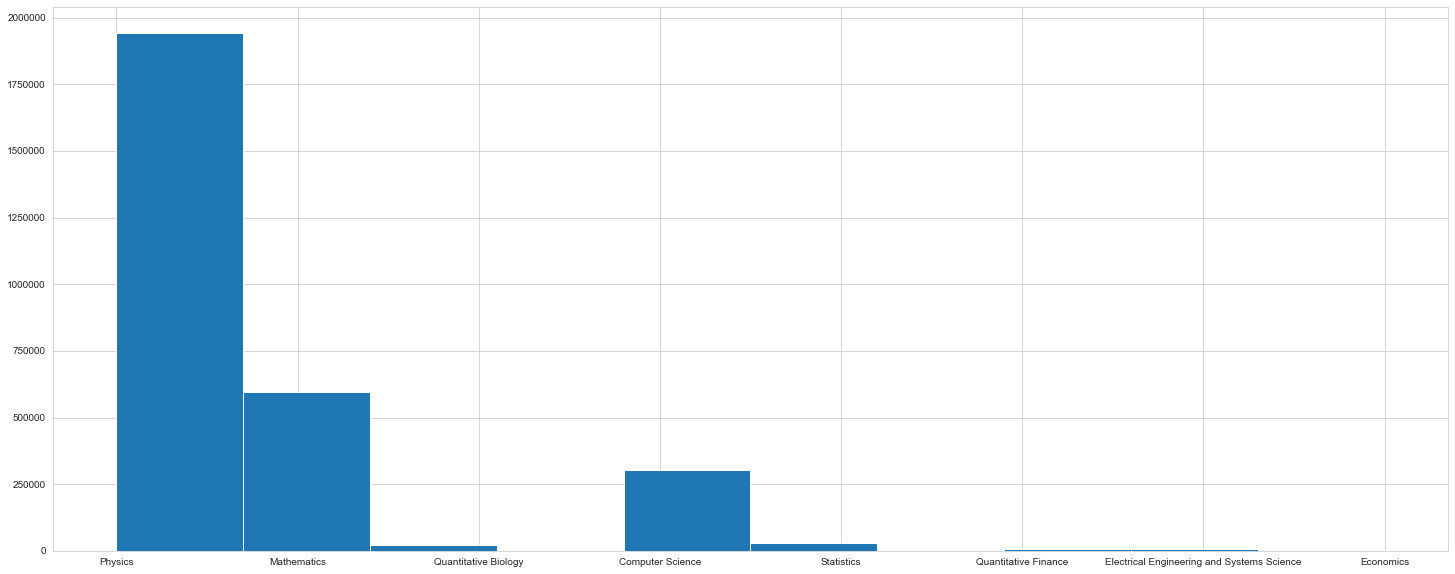

In [3]:
df['clean categories'].hist(figsize=(25,10))

## This histogram shows an unbalanced dataset. Physics papers dominate the dataset. 

#### This means that the dataset does not contain an approximate equal portion of each class.

In [4]:
physics = df[df['clean categories'] == 'Physics']
mathematics = df[df['clean categories'] == 'Mathematics']
statistics = df[df['clean categories'] == 'Statistics']
economics = df[df['clean categories'] == 'Economics']
qbiology = df[df['clean categories'] == 'Quantitative Biology']
qfinance = df[df['clean categories'] == 'Quantitative Finance']
cs = df[df['clean categories'] == 'Computer Science']
eess = df[df['clean categories'] == 'Electrical Engineering and Systems Science']

In [5]:
print('Number of Physics Papers: ' + str(len(physics)))
print('Number of Mathematics Papers: ' + str(len(mathematics)))
print('Number of Statistics Papers: ' + str(len(statistics)))
print('Number of Economics Papers: ' + str(len(economics)))
print('Number of Quantitative Biology Papers: ' + str(len(qbiology)))
print('Number of Quantitative Finance Papers: ' + str(len(qfinance)))
print('Number of Computer Science Papers: ' + str(len(cs)))
print('Number of Electrical Engineering and Systems Science Papers: ' + str(len(eess)))
total = len(physics) + len(mathematics) + len(statistics) + len(economics) + len(qbiology) + len(qfinance) + len(cs) + len(eess)
print('Total: ' + str(total))

Number of Physics Papers: 1942136
Number of Mathematics Papers: 596153
Number of Statistics Papers: 31116
Number of Economics Papers: 1029
Number of Quantitative Biology Papers: 22347
Number of Quantitative Finance Papers: 8535
Number of Computer Science Papers: 304834
Number of Electrical Engineering and Systems Science Papers: 6815
Total: 2912965


In [6]:
df['abstract length'] = df['abstract'].str.len().tolist()

### Abstract length per paper category 

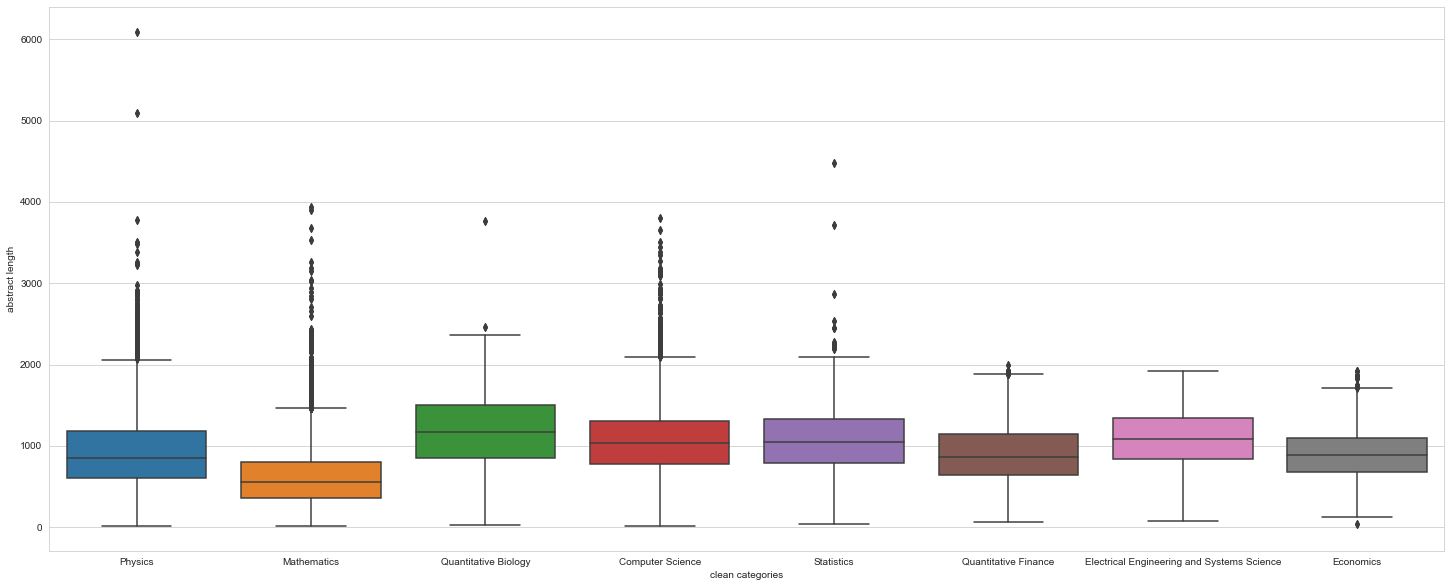

In [7]:
plt.figure(figsize=(25,10))
sns.boxplot(data=df, x='clean categories', y='abstract length');

In [8]:
quantile_95 = df['abstract length'].quantile(0.95)
df_95 = df[df['abstract length'] < quantile_95]

Removing from the 95% percentile onwards:

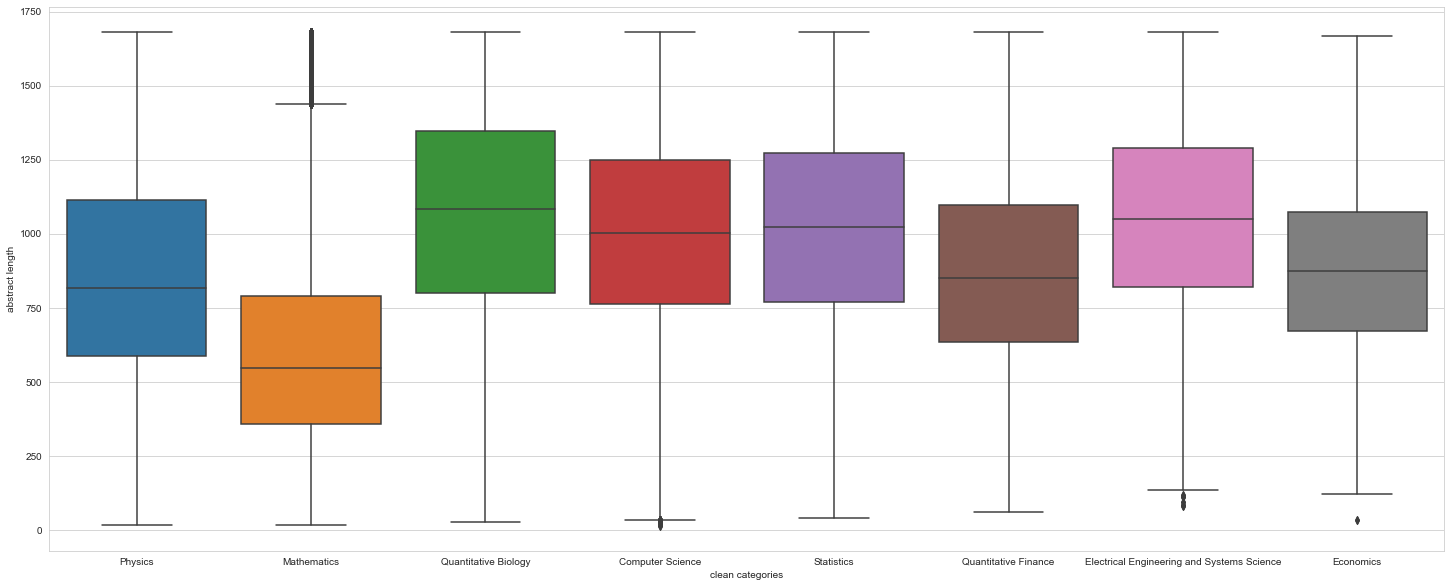

In [10]:
plt.figure(figsize=(25,10))
sns.boxplot(data=df_95, x='clean categories', y='abstract length');

From the box plots we can see that the abstracts are very similar in length but the "Mathematics" papers tend to be shorter. 

### Abstract length distribution 

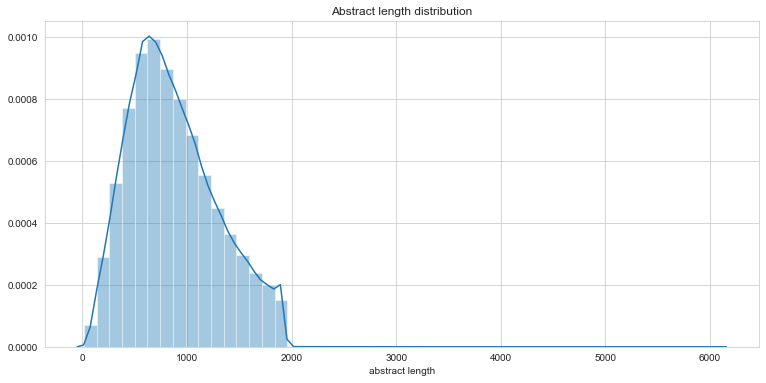

In [12]:
plt.figure(figsize=(12.8,6))
sns.distplot(df['abstract length']).set_title('Abstract length distribution');

In [13]:
df['abstract length'].describe()

count    2.912965e+06
mean     8.734246e+02
std      4.219509e+02
min      1.400000e+01
25%      5.550000e+02
50%      8.110000e+02
75%      1.147000e+03
max      6.091000e+03
Name: abstract length, dtype: float64

Removing from the 95% percentile onwards:

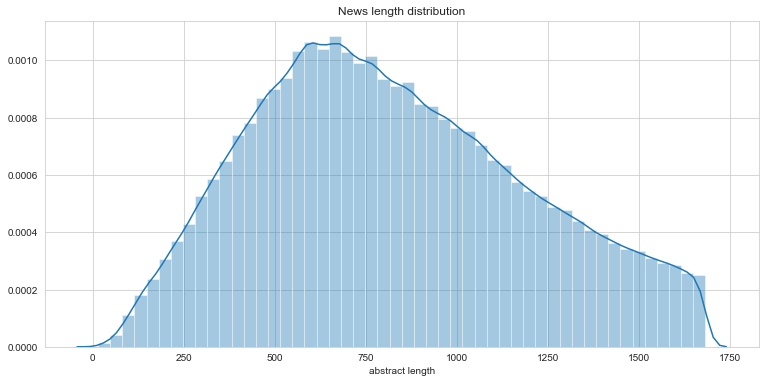

In [16]:
plt.figure(figsize=(12.8,6))
sns.distplot(df_95['abstract length']).set_title('News length distribution');

In [ ]:
# physics = df[df['clean categories'] == 'Physics'][:1029]
# mathematics = df[df['clean categories'] == 'Mathematics'][:1029]
# statistics = df[df['clean categories'] == 'Statistics'][:1029]
# economics = df[df['clean categories'] == 'Economics'][:1029]
# qbiology = df[df['clean categories'] == 'Quantitative Biology'][:1029]
# qfinance = df[df['clean categories'] == 'Quantitative Finance'][:1029]
# cs = df[df['clean categories'] == 'Computer Science'][:1029]
# eess = df[df['clean categories'] == 'Electrical Engineering and Systems Science'][:1029]

In [ ]:
# undersampled = physics.append(mathematics)
# undersampled = undersampled.append(statistics)
# undersampled = undersampled.append(economics)
# undersampled = undersampled.append(qbiology)
# undersampled = undersampled.append(qfinance)
# undersampled = undersampled.append(cs)
# undersampled = undersampled.append(eess)

In [ ]:
# undersampled

In [ ]:
# undersampled['clean categories'].hist(figsize=(25,10))

In [ ]:
# undersampled.to_csv('single.csv')